Oscilaciones acopladas de una varilla que pende de dos muelles

La ecuación diferencia que describe el movimiento de un resorte sin fricción es:$m\frac{d^{2}x}{dt^{2}}+kx=0$   

Donde x es la elongación del resorte, m la masa que le cuelga y k su constante elástica. 

La ecuación diferencia que describe el movimiento de torsión de un cuerpo suspendido del extremo de un eje elástico sin fricción es $I \frac{d^{2}\theta}{dt^{2}}+k\theta=0$

Donde I es el momento de inercia del cuerpo suspendido y k es la constante elástica del eje.

Cuando la varilla está en equilibrio en posición horizontal. La resultante de las fuerzas sobre la varilla debe ser cero y el momento resultante respecto del c.m. debe ser cero.

$k_1x_1+ k_2x_2=mg$,Suma de fuerzas.

$-k_1x_1·d_1+ k_2x_2·d_2=0$,Suma de torques.

Donde $d_1$ y $d_2$ son la distancia horizontal del resorte al c.m. de la varilla.

Despejamos $x_1$ y $x_2$

$x_1=\frac{mgd_2}{k_1(d_1+d_2)}$

$x_2=\frac{mgd_1}{k_2(d_1+d_2)}$


Para el sistema se tiene que:

$m\frac{d^{2}y}{dt^{2}}=k_1(x_1-y_1)+k_2(x_2-y_2)-mg$  

Donde $y_1=y-tan(\theta)d_1$ y $y_2=y+tan(\theta)d_2$

$I\frac{d^{2}\theta}{dt^{2}}=-k_1(x_1-y_1)d_1+k_2(x_2-y_2)d_2$  

Entonces el sistema queda como:

$\frac{dy}{dt}=v$

$\frac{d\theta}{dt}=\omega$

$\frac{dv}{dt}=\frac{k_1(x_1-y_1)+k_2(x_2-y_2)-mg}{m}$  

$\frac{d\omega}{dt}=\frac{-k_1(x_1-y_1)d_1+k_2(x_2-y_2)d_2}{I}$  

In [0]:
#librerias a usar
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.animation as animation
from IPython.display import HTML

In [0]:
N=1000000 #Número de veces que se iterara.
t1=[0]
t2=[0]
t3=[0]
h=0.01
#Constantes a usar en el sistema internacional.
yo=0.55 #altura del centro de masa
m=1 #masa de la varilla
g=9.77 #gravedad
k1=1.8 #constante elastica del primer resorte
k2=0.4 #constante elastica del segundo resorte
L=1 #longitud de la varilla
l1=0.7 #altura del primer resorte
l2=1 #altura del segundo resorte
I=m*(L**2)/12 #momento de inercia de la varilla
d=L*0.5 #distancia entre los extremos de la varilla y su centro de masa
d1=d*np.random.random() #distancia del primer resorte al centro de masa de la varilla
d2=d*np.random.random() #distancia del primer resorte al centro de masa de la varilla
x1=(m*g*d2)/(k1*(d1+d2)) 
x2=(m*g*d1)/(k2*(d1+d2)) 

In [0]:
#Condiciones iniciales para el metodo de euler.
y=[yo]
v=[0]
teta=[np.pi*0.15]
omega=[0]
y1=[y[0]-np.tan(teta[0])*d1]
y2=[y[0]+np.tan(teta[0])*d2]

In [0]:
#Condiciones iniciales para el metodo RK2.
Y=[yo]
V=[0]
TETA=[np.pi*0.15]
OMEGA=[0]
Y1=[Y[0]-np.tan(teta[0])*d1]
Y2=[Y[0]+np.tan(teta[0])*d2]

In [0]:
#Condiciones iniciales para el metodo RK4.
aY=[yo]
aV=[0]
aTETA=[np.pi*0.15]
aOMEGA=[0]
aY1=[aY[0]-np.tan(aTETA[0])*d1]
aY2=[aY[0]+np.tan(aTETA[0])*d2]

In [0]:
#Funciones que dan las ED a resolver.
def dy(a):#dy/dt
    return a
def dteta(a):#dteta/dt
    return a
def dv(a,b):#dv/dt
    return ((k1*(x1-a))+(k2*(x2-b))-m*g)/m
def domega(a,b):#domega/dt
    return (-(k1*(x1-a)*d1)+(k2*(x2-b)*d2))/I

En este problema ninguna ED depende del tiempo explícitamente, ósea que para los métodos numéricos el valor del tiempo no afectaran en los resultados.

Para el método que en su nombre tenga un 1 significa que la función depende de una variable, para el 2 esta depende de 2.

Euler

In [0]:
def euler1(q,a,b):
    return a+h*q(b)
def euler2(q,a,b,c):
    return a+h*q(b,c)

In [0]:
for i in range(1,N):
    y.append(euler1(dy,y[i-1],v[i-1]))
    teta.append(euler1(dteta,teta[i-1],omega[i-1]))
    v.append(euler2(dv,v[i-1],y1[i-1],y2[i-1]))
    omega.append(euler2(domega,omega[i-1],y1[i-1],y2[i-1]))
    #El if se usó para que el ángulo entregado solo este entre 0 y 2*pi
    if teta[i]>2*np.pi:
        teta[i]=teta[i]-2*np.pi
    elif teta[i]<0:
        teta[i]=teta[i]+2*np.pi
    t1.append(t1[i-1]+h)
    y1.append(y[i]-np.tan(teta[i])*d1)
    y2.append(y[i]+np.tan(teta[i])*d2)
    if y[i]<0 or y[i]-np.tan(teta[i])*d<0 or y[i]+np.tan(teta[i])*d<0:
        break

El método usado en Euler se repite para los casos RK donde solo cambiara el método a resolver.

RK2

In [0]:
def RK21(q,a,b):
    k0=h*q(b)
    k1=h*q(b+k0)
    return a+0.5*(k0+k1)
def RK22(q,a,b,c):
    k0=h*q(b,c)
    k1=h*q(b+k0,c+k0)
    return a+0.5*(k0+k1)

In [0]:
for i in range(1,N):
    Y.append(RK21(dy,Y[i-1],V[i-1]))
    TETA.append(RK21(dteta,TETA[i-1],OMEGA[i-1]))
    V.append(RK22(dv,V[i-1],Y1[i-1],Y2[i-1]))
    OMEGA.append(RK22(domega,OMEGA[i-1],Y1[i-1],Y2[i-1]))
    if TETA[i]>2*np.pi:
        TETA[i]=TETA[i]-2*np.pi
    elif TETA[i]<0:
        TETA[i]=TETA[i]+2*np.pi
    t2.append(t2[i-1]+h)
    Y1.append(Y[i]-np.tan(TETA[i])*d1)
    Y2.append(Y[i]+np.tan(TETA[i])*d2)
    if Y[i]<0 or Y[i]-np.tan(TETA[i])*d<0 or Y[i]+np.tan(TETA[i])*d<0:
        break

RK4

In [0]:
def RK41(q,a,b):
    k0=h*q(b)
    k1=h*q(b+k0*0.5)
    k2=h*q(b+k1*0.5)
    k3=h*q(b+k2)
    return a+(1/6)*(k0+2*k1+2*k2+k3)
def RK42(q,a,b,c):
    k0=h*q(b,c)
    k1=h*q(b+k0*0.5,c+k0*0.5)
    k2=h*q(b+k1*0.5,c+k1*0.5)
    k3=h*q(b+k2,c+k2)
    return a+(1/6)*(k0+2*k1+2*k2+k3)

In [0]:
for i in range(1,N):
    aY.append(RK41(dy,aY[i-1],aV[i-1]))
    aTETA.append(RK41(dteta,aTETA[i-1],aOMEGA[i-1]))
    aV.append(RK42(dv,aV[i-1],aY1[i-1],aY2[i-1]))
    aOMEGA.append(RK42(domega,aOMEGA[i-1],aY1[i-1],aY2[i-1]))
    if aTETA[i]>2*np.pi:
        aTETA[i]=aTETA[i]-2*np.pi
    elif aTETA[i]<0:
        aTETA[i]=aTETA[i]+2*np.pi
    t3.append(t3[i-1]+h)
    aY1.append(aY[i]-np.tan(aTETA[i])*d1)
    aY2.append(aY[i]+np.tan(aTETA[i])*d2)
    if aY[i]<0 or aY[i]-np.tan(aTETA[i])*d<0 or aY[i]+np.tan(aTETA[i])*d<0:
        break

Se graficaran todos los métodos.

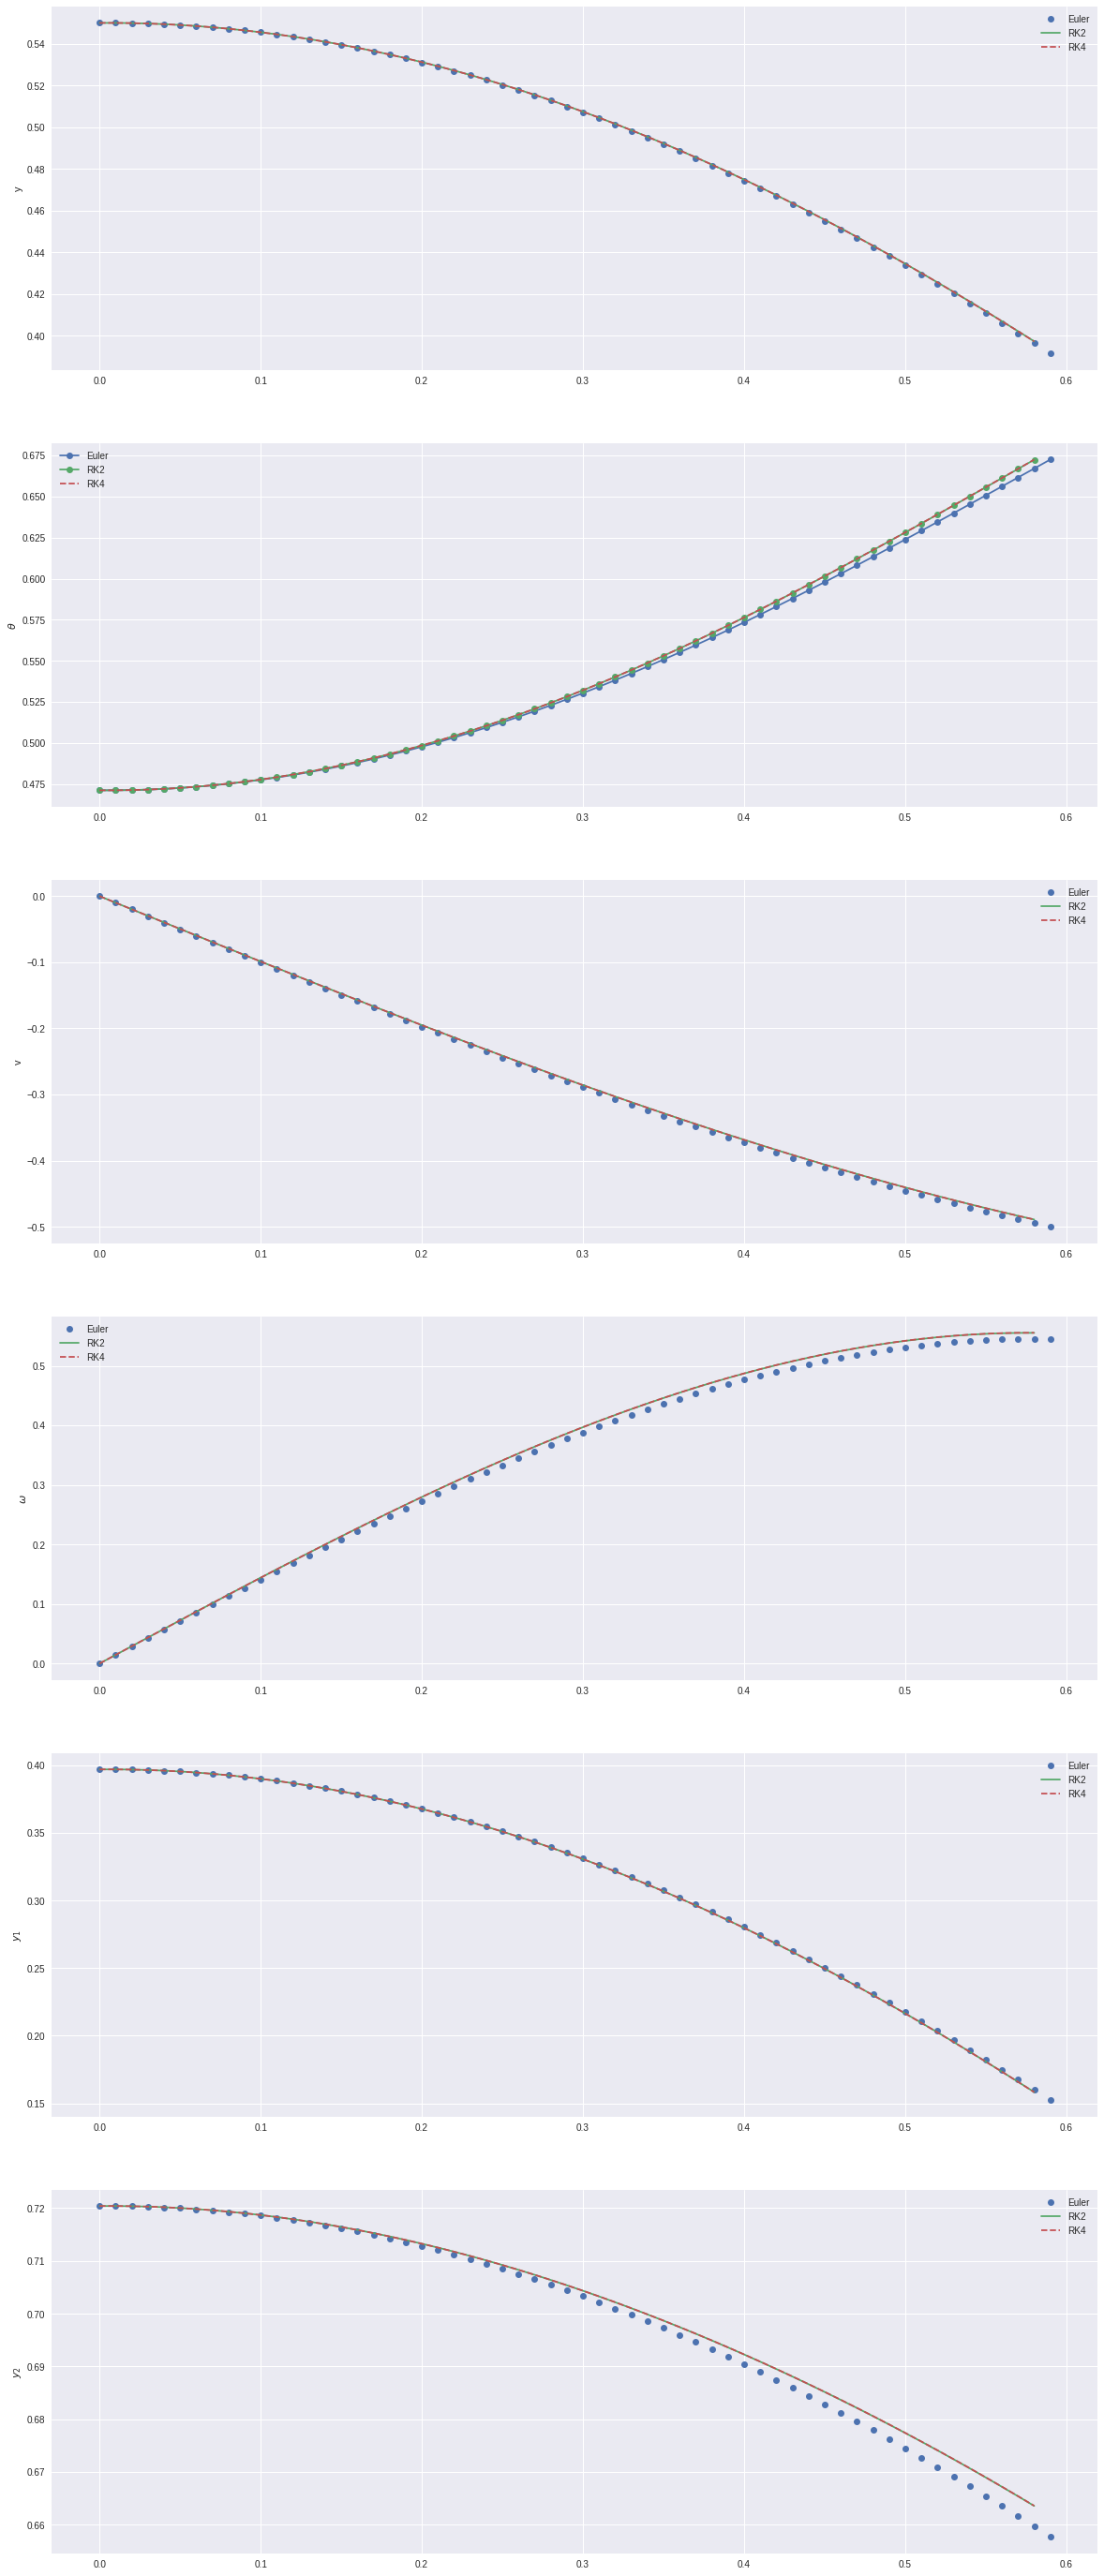

In [29]:
#Se graficara la los valores hallados contra el tiempo.
plt.figure(figsize=(20,50))

plt.subplot(6,1,1)
plt.plot(t1,y,"o",label="Euler")
plt.plot(t2,Y,"-",label="RK2")
plt.plot(t3,aY,"--",label="RK4")
plt.ylabel("y")
plt.legend()

plt.subplot(6,1,2)
plt.plot(t1,teta,"-o",label="Euler")
plt.plot(t2,TETA,"-o",label="RK2")
plt.plot(t3,aTETA,"--",label="RK4")
plt.ylabel("$\\theta$")
plt.legend()

plt.subplot(6,1,3)
plt.plot(t1,v,"o",label="Euler")
plt.plot(t2,V,"-",label="RK2")
plt.plot(t3,aV,"--",label="RK4")
plt.ylabel("v")
plt.legend()

plt.subplot(6,1,4)
plt.plot(t1,omega,"o",label="Euler")
plt.plot(t2,OMEGA,"-",label="RK2")
plt.plot(t3,aOMEGA,"--",label="RK4")
plt.ylabel("$\\omega$")
plt.legend()

plt.subplot(6,1,5)
plt.plot(t1,y1,"o",label="Euler")
plt.plot(t2,Y1,"-",label="RK2")
plt.plot(t3,aY1,"--",label="RK4")
plt.ylabel("$y_1$")
plt.legend()

plt.subplot(6,1,6)
plt.plot(t1,y2,"o",label="Euler")
plt.plot(t2,Y2,"-",label="RK2")
plt.plot(t3,aY2,"--",label="RK4")
plt.ylabel("$y_2$")
plt.legend()

plt.savefig('varilla.png')
plt.show()

Animacion

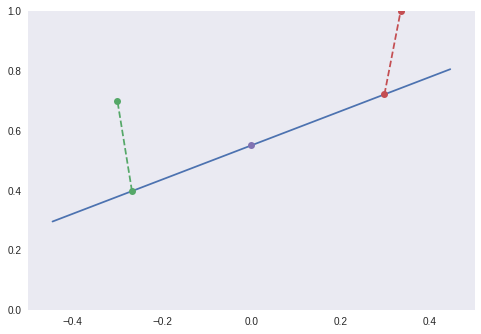

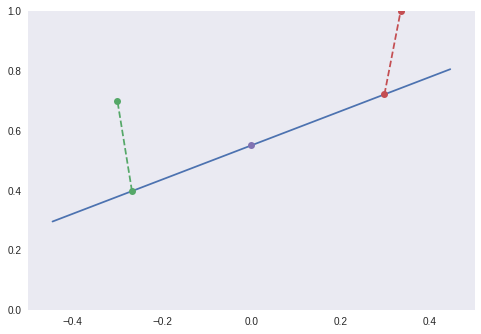

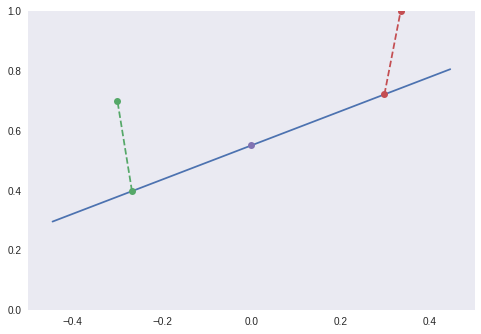

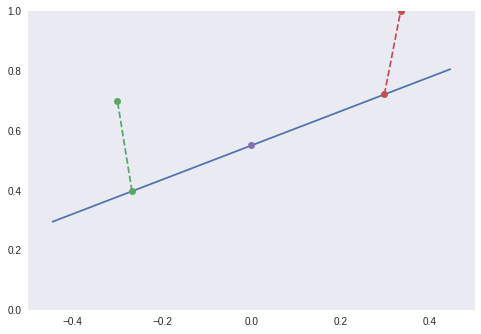

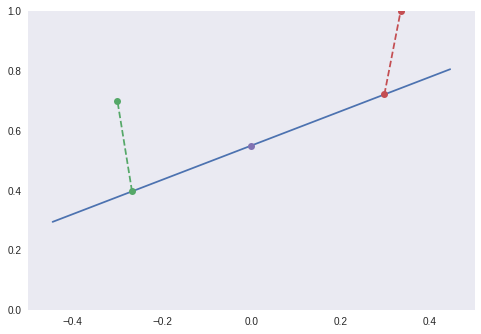

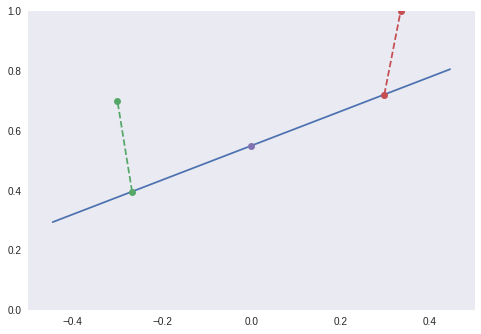

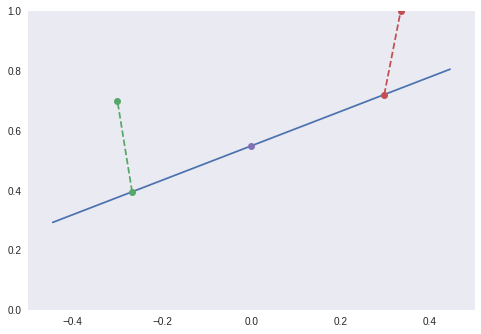

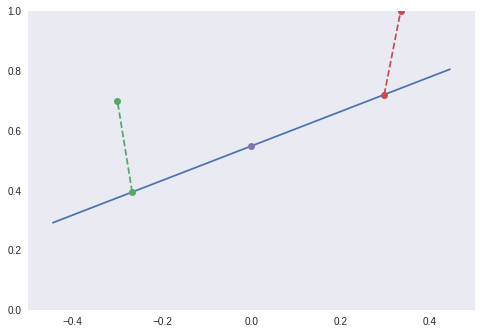

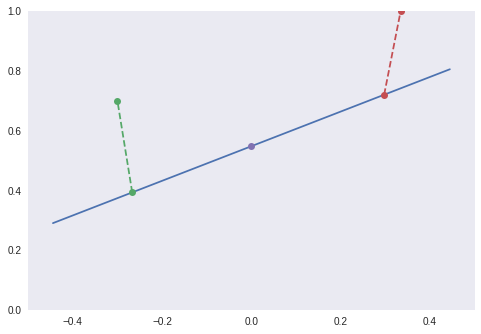

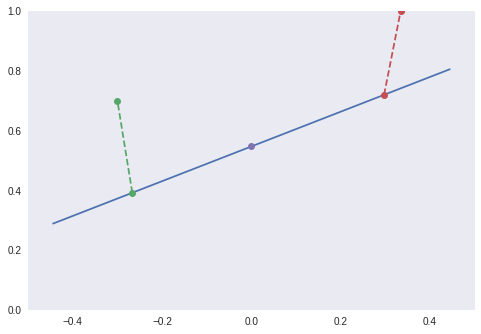

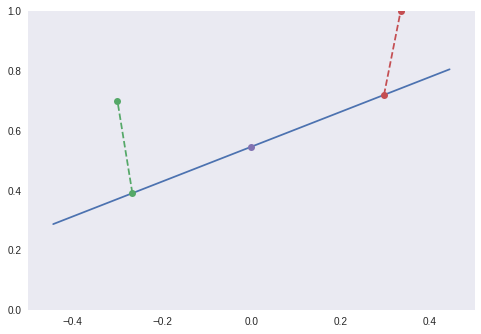

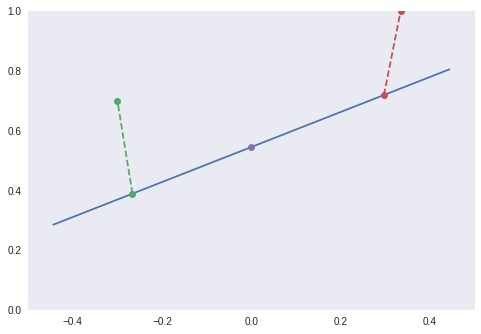

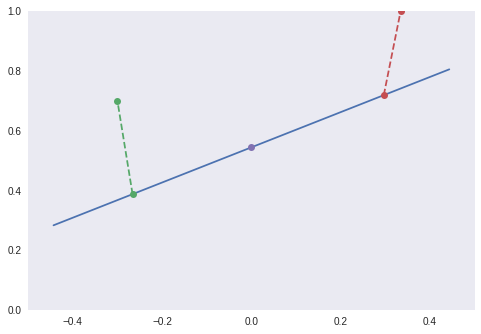

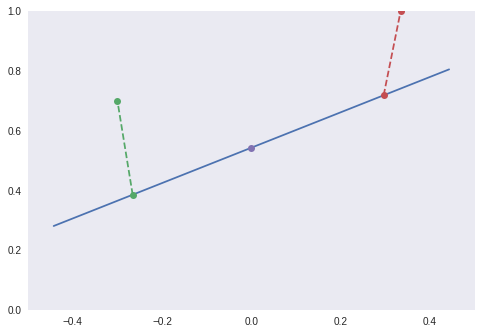

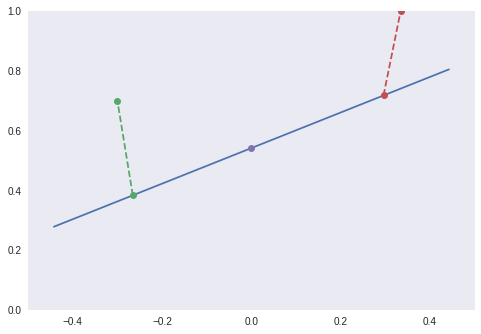

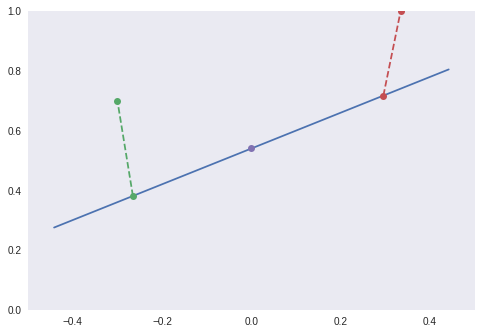

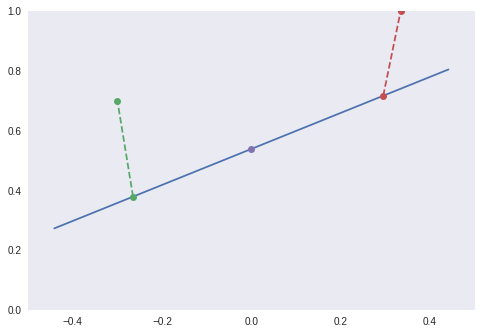

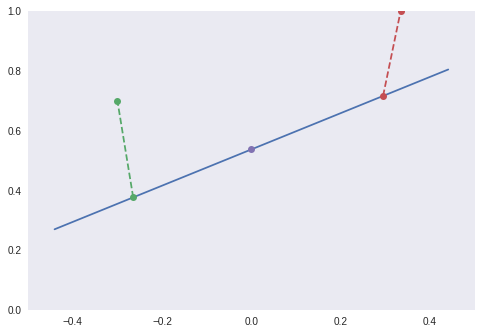

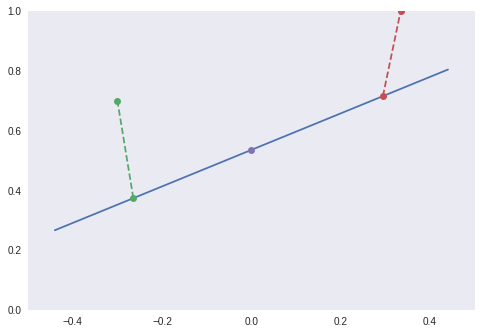

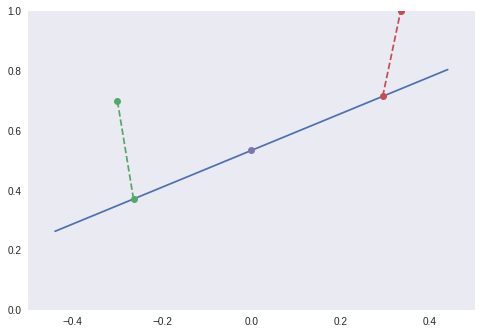

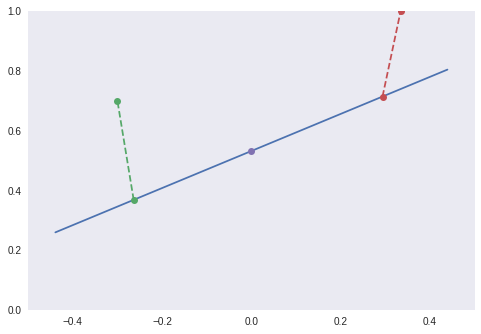

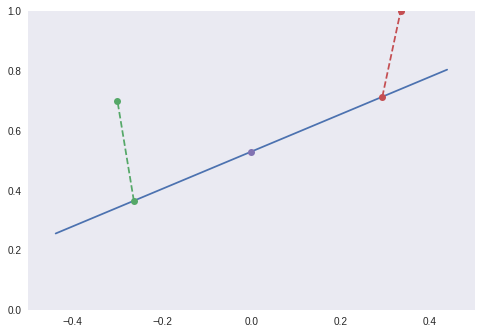

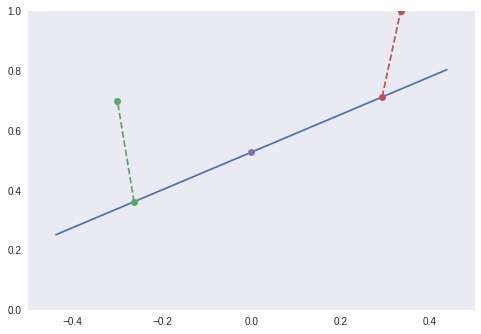

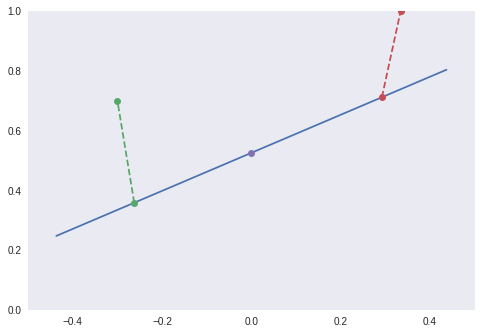

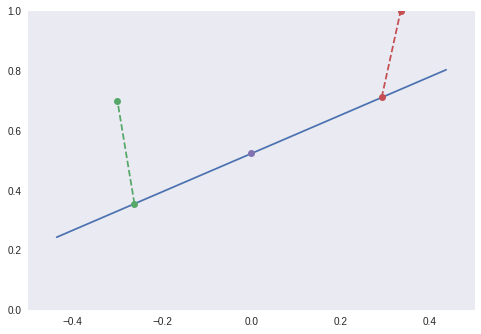

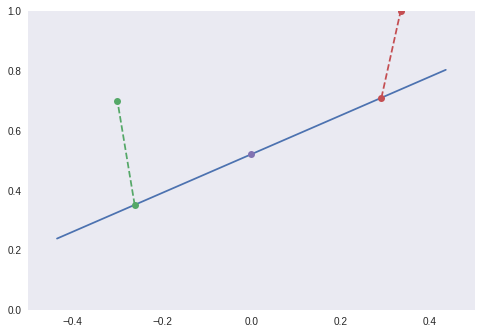

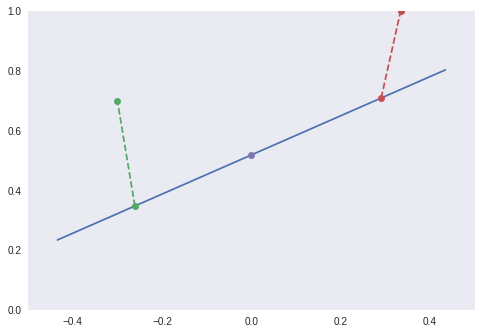

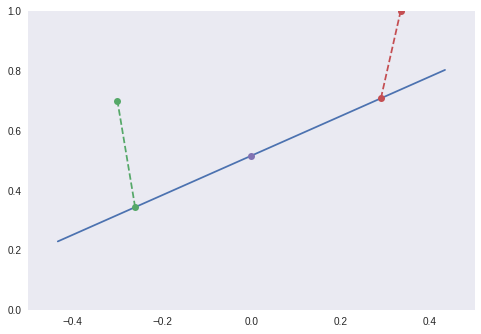

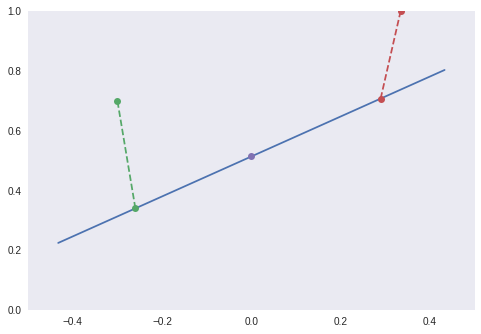

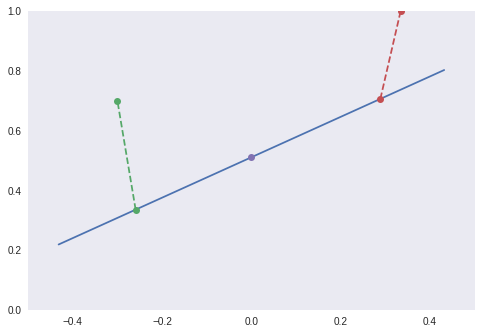

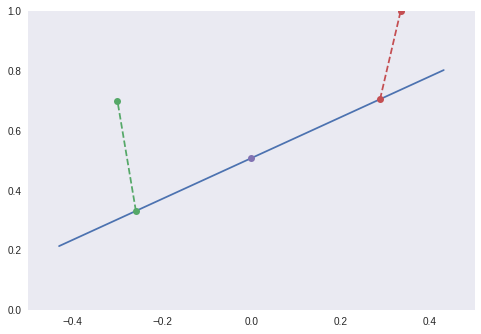

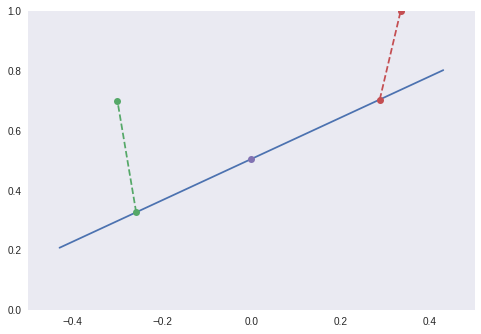

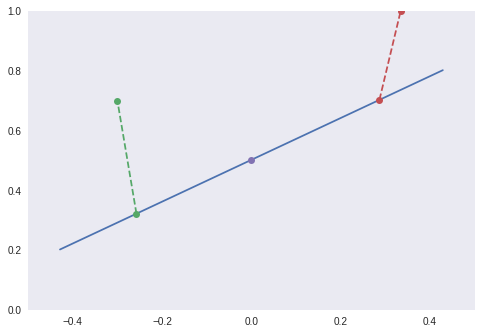

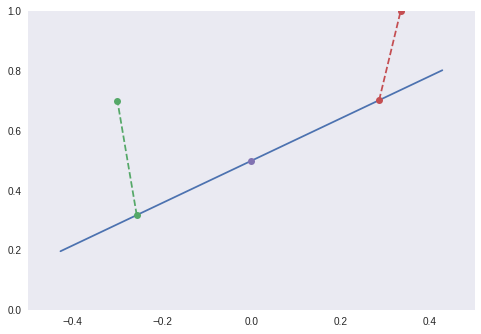

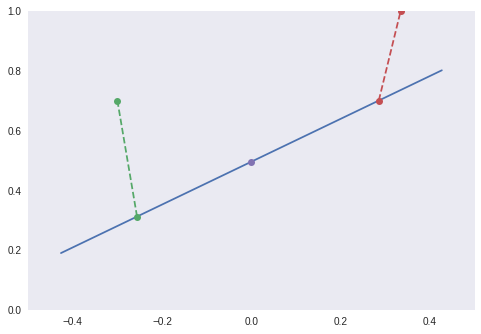

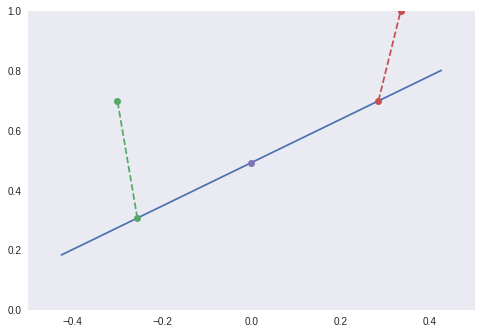

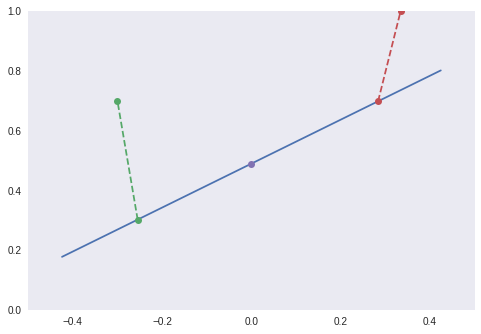

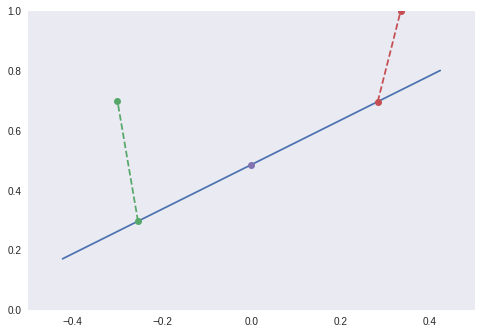

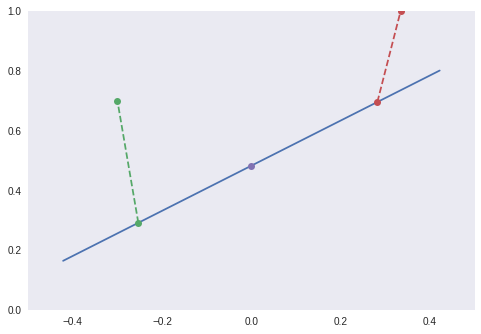

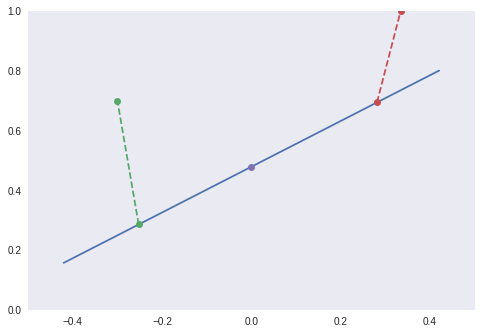

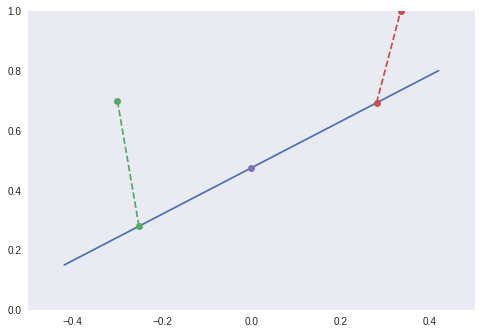

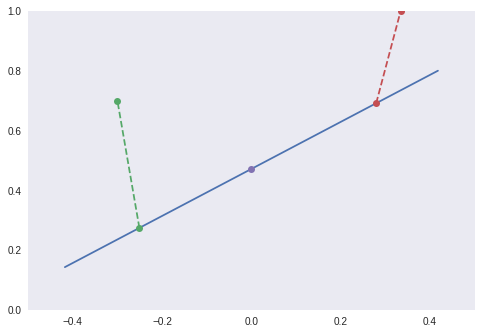

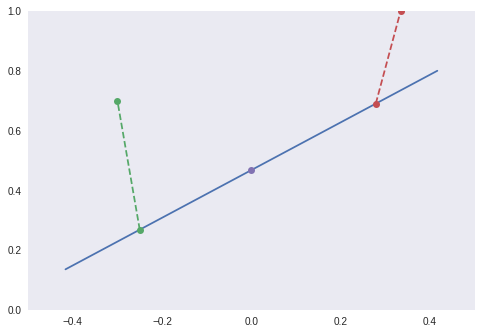

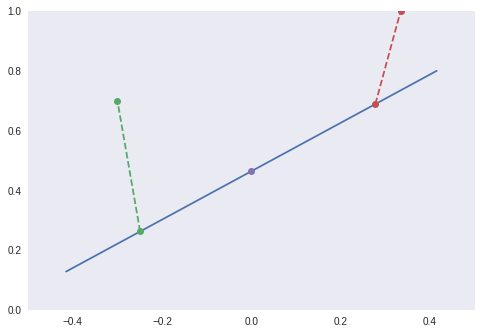

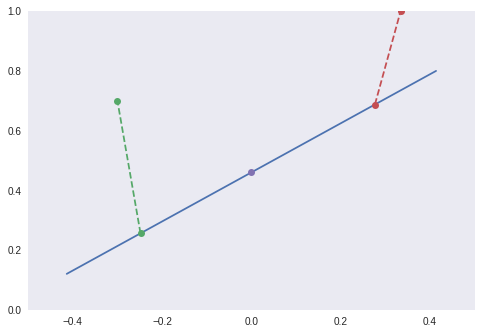

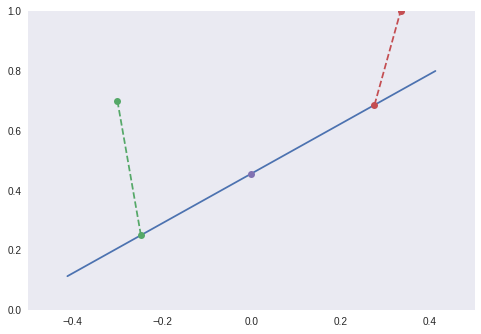

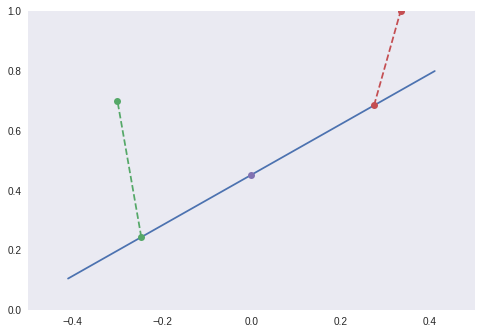

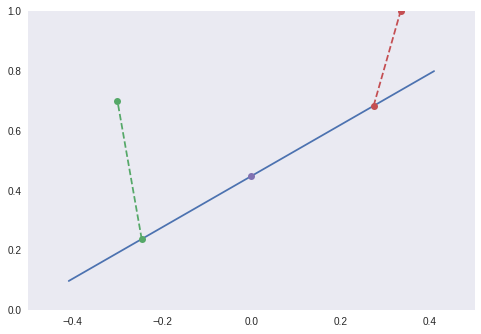

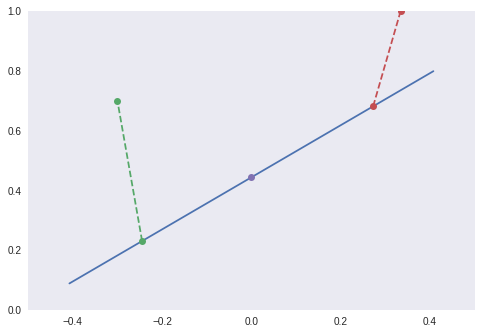

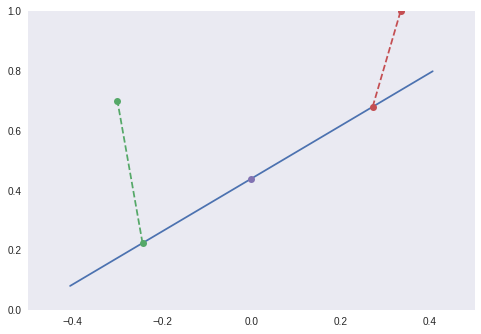

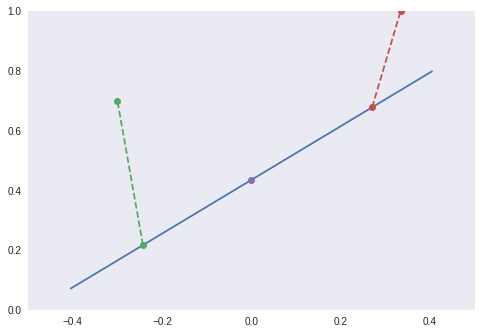

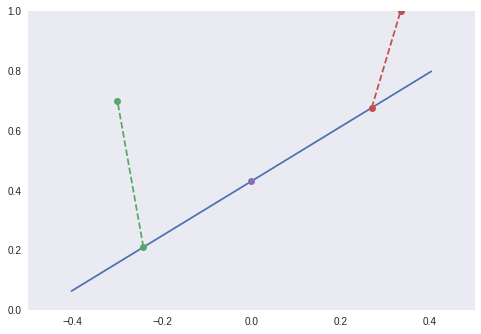

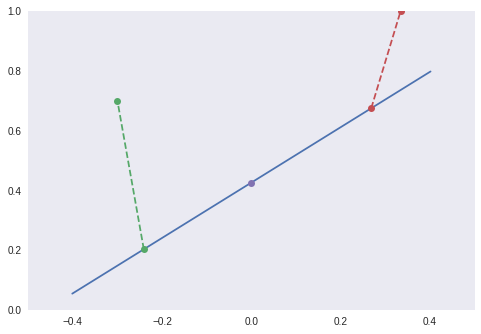

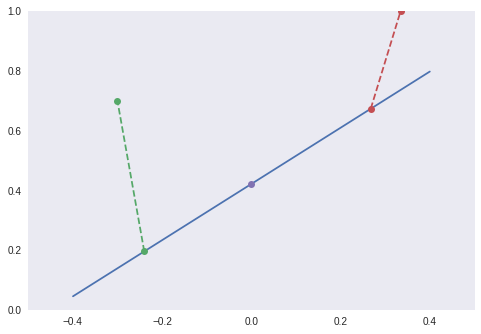

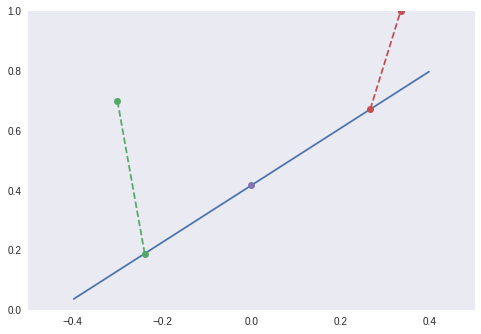

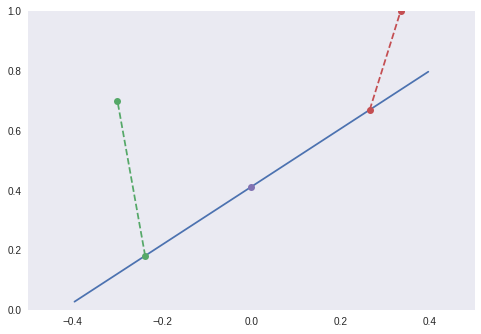

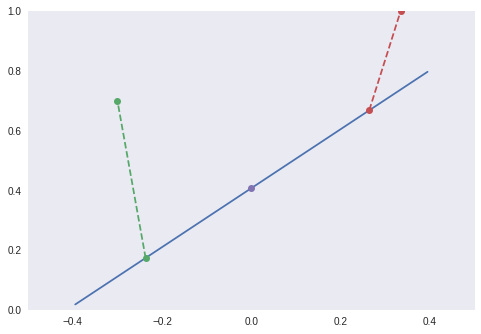

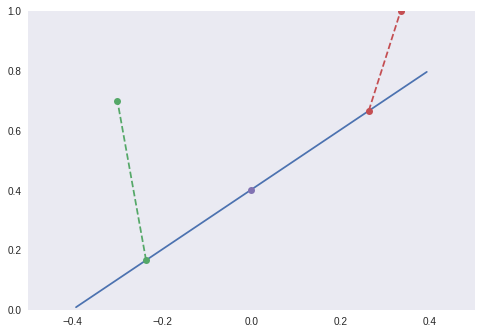

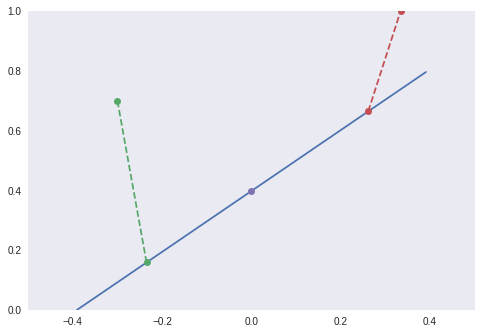

In [30]:
if l1<l2:
    max=l2
else:
    max=l1
for i in range (0,len(aY1),):
    plt.grid()
    plt.plot([-d*np.cos(aTETA[i]),d*np.cos(aTETA[i])],[aY[i]-np.tan(aTETA[i])*d,aY[i]+np.tan(aTETA[i])*d])
    plt.plot([-d1*np.cos(aTETA[i]),-d1],[aY1[i],l1],"--o")
    plt.plot([d2*np.cos(aTETA[i]),d2],[aY2[i],l2],"--o")
    plt.plot(0,aY[i],"o")
    plt.xlim(-d,d)
    plt.ylim(0,max)
    plt.show()

In [0]:
#from apng import APNG

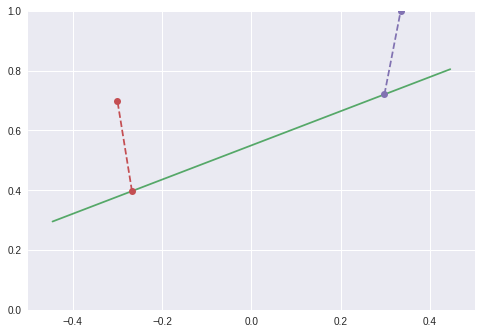

In [32]:
#matplotlib.use("Agg")
#Writer = animation.writers["ffmpeg"]
#writer = Writer(fps=15, metadata=dict(artist="Me"), bitrate=1800)
fig, ax = plt.subplots()
ax.axis([-d,d,0,max])
l, = ax.plot([],[])
vara, = ax.plot([], [])
resorte1, =ax.plot([], [], "--o")
resorte2, =ax.plot([], [], "--o")

def animate(c):
    x = [-d*np.cos(aTETA[c]),d*np.cos(aTETA[c])]
    y = [aY[c]-np.tan(aTETA[c])*d,aY[c]+np.tan(aTETA[c])*d]
    r1=[-d1*np.cos(aTETA[c]),-d1]
    r2=[aY1[c],l1]
    R1=[d2*np.cos(aTETA[c]),d2]
    R2=[aY2[c],l2]
    vara.set_data(x, y)
    resorte1.set_data(r1,r2)
    resorte2.set_data(R1,R2)
    return vara,resorte1,resorte2

ani = animation.FuncAnimation(fig, animate, np.arange(0, len(aY1)),interval=len(t3))
#ani.save('im.mp4', writer=writer)

HTML(ani.to_jshtml())